# **Applied Machine Learning: Best Model : 12/18/23**
**Team HDR: Ryan Pittman, Daniel de las Heras, Hasibul Jishan**

Objective: Final Best Model.

## Functions and Imports

In [ ]:
# Import the necessary Python libraries for EDA
import  pandas  as pd
import  numpy   as np
import  matplotlib.pyplot as plt
import  scipy
from    scipy import stats
import  seaborn as sns
from    scipy import stats
from    sklearn.preprocessing import StandardScaler
from    datetime import datetime
from    sklearn.linear_model import LogisticRegression
from    sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBRegressor
from xgboost import XGBClassifier

#from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

from tqdm import tqdm

from sklearn.metrics import roc_auc_score

In [ ]:
# Function that performs a 0.25-0.75 datasplit and standardizes the data
def dataSplitStandard(X,y,ListColumnsToStandardize):
  # Data split and standarization
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  mean = X_train[ListColumnsToStandardize].mean()
  stdev = X_train[ListColumnsToStandardize].std()
  #run without this for KNN first
  X_train_st = X_train.copy()
  X_train_st[ListColumnsToStandardize] = (X_train[ListColumnsToStandardize] - mean)/stdev
  #X_train_st.boxplot()
  X_test_st = X_test.copy()
  X_test_st[ListColumnsToStandardize] = (X_test[ListColumnsToStandardize] - mean)/stdev
  return X_train_st, X_test_st, y_train, y_test

In [ ]:
# Function that takes a list of models and fits them 1000 times
# Recording Accuracy, Precision, Recall and ROC Score
def MultipleRuns(modelList,X,y, ListColumnsToStandardize):
  # Run the models 1000 and get the median accuracy
  modelColumns = np.arange(len(modelList))
  nModels = len(modelList)
  acc = pd.DataFrame(columns = modelColumns)
  pre = pd.DataFrame(columns = modelColumns)
  rec = pd.DataFrame(columns = modelColumns)
  roc = pd.DataFrame(columns = modelColumns)

  for i in tqdm(range(1000)):

  # Data split and standarization
    X_train, X_test, y_train, y_test = dataSplitStandard(X,y,ListColumnsToStandardize)


  # Run Models
    x = []
    a = []
    b = []
    c = []
    for i in range(nModels):
      modelList[i].fit(X_train, y_train)
      y_pred = modelList[i].predict(X_test)
      x.append(metrics.accuracy_score(y_test,y_pred))
      a.append(metrics.precision_score(y_test,y_pred))
      b.append(metrics.recall_score(y_test,y_pred))
      c.append(roc_auc_score(y_test,y_pred))

    acc.loc[len(acc)] = x
    pre.loc[len(pre)] = a
    rec.loc[len(rec)] = b
    roc.loc[len(roc)] = c

  return acc, pre, rec, roc

In [ ]:
# Read Data

# Numerical Columns to Standardize
cols = ['year', 'revenue',  'employee_growth1',
       'employee_growth2', 'alexa_rank','total_funding', 'recent_funding',
       'recent_funding_date', 'number_locations',
       'it_budget']
# Most IMportant Features according to feature importance of models
impFeatures = ['year', 'revenue','alexa_rank','recent_funding_date','number_locations',
       'it_budget']

# Reads Current and Prospect Datasets
prospect = pd.read_csv(r"prospectData.csv").set_index('CompanyID',drop = True)
prospect = prospect.drop(index = prospect[prospect['ihc']=='mm'].index.tolist())
prospect = prospect.drop(columns= ['cc','ihc'])
prospect = prospect.dropna()

current = pd.read_csv(r"currentData.csv").set_index('CompanyID',drop = True)
current = current.drop(columns = ['cc','ihc'])

In [ ]:
# Split features and label1
X = current.loc[:,:'it_budget']
y = current['label']

## Label 1

### Metrics

In [ ]:
# Declares tuned model objects
log = LogisticRegression()
dtrees = DecisionTreeClassifier(criterion='entropy', max_depth=3)
rf = RandomForestClassifier(max_depth = 3, n_estimators=3)
et = ExtraTreesClassifier(n_estimators=3)
knn = KNeighborsClassifier(n_neighbors=2)
gb = GradientBoostingClassifier(n_estimators=3)
xgb = XGBClassifier(objective="binary:logistic")
#cb = CatBoostClassifier()
lgbm = LGBMClassifier()

# Puts the models into a list
modelList = [log,dtrees,rf,et,knn,gb,xgb,lgbm]
modelNames = ['log','dtrees','rf','et','knn','gb','xgb','lgbm']

In [ ]:
# Runs metrics of the models above from 1000 times
acc, pre, rec, roc = MultipleRuns(modelList,X,y, cols)
acc.columns = modelNames
pre.columns = modelNames
rec.columns = modelNames
roc.columns = modelNames

Boxplots of metrics of each model

<Axes: >

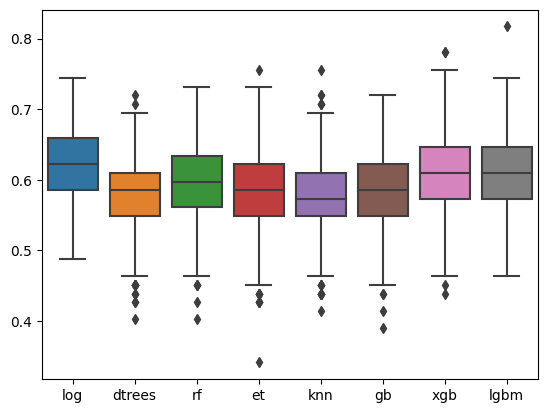

In [ ]:

sns.boxplot(acc)

<Axes: >

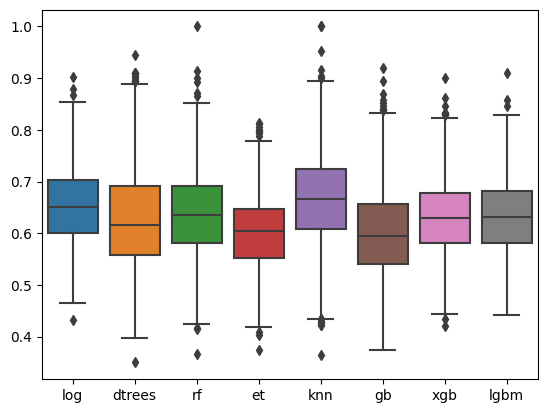

In [ ]:
sns.boxplot(pre)

<Axes: >

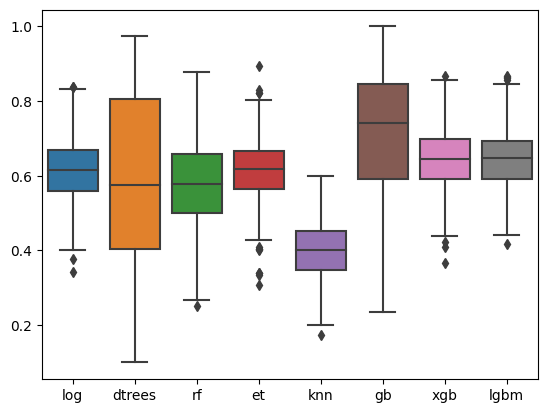

In [ ]:
sns.boxplot(rec)

<Axes: >

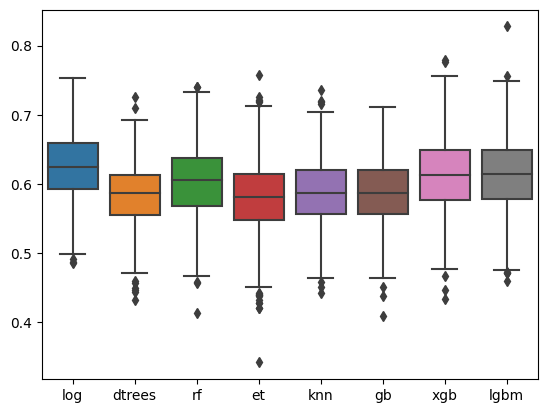

In [ ]:
sns.boxplot(roc)

### Recomend Prospect Companies (Based on label1)

In [ ]:
log = LogisticRegression()
xgb = XGBClassifier(objective="binary:logistic")
lgbm = LGBMClassifier()
rf = RandomForestClassifier(max_depth = 3, n_estimators=3)
dtrees = DecisionTreeClassifier(criterion='entropy', max_depth=3)
et = ExtraTreesClassifier(n_estimators=3)
gb = GradientBoostingClassifier(n_estimators=3)
knn = KNeighborsClassifier(n_neighbors=2)


modelList = [log,xgb,lgbm,rf,dtrees,et,gb,knn]
modelNames = ['log','xgb','lgbm','rf','dtrees','et','gb','knn']

In [ ]:
# Fit and predict all the models with the whole current dataset
recomend = pd.DataFrame()
for i in range(len(modelList)):
  modelList[i].fit(X,y)
  recomend[modelNames[i]]= list(modelList[i].predict(prospect))
recomend.index = prospect.index

In [ ]:
# Gets the Company IDs of all the companies recomended by all the models
companiesIDs = recomend[(recomend.log==1)&(recomend.xgb==1) &(recomend.lgbm==1)&(recomend.rf==1)&(recomend.dtrees==1)&(recomend.et==1)& (recomend.gb==1) & (recomend.knn==1)].index


<Axes: xlabel='revenue', ylabel='Count'>

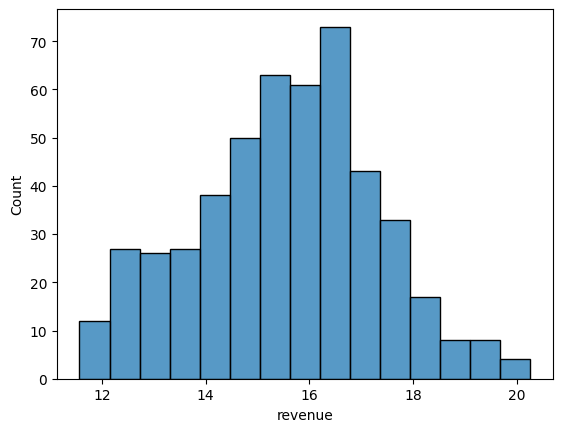

In [ ]:
# Revenue Distribution plot of recomended companies
sns.histplot(prospect.loc[companiesIDs]['revenue'])

## Label 2

In [ ]:
# Divide total billling sum by the number of
# locations the company is being billed
current['label2']=current['lifetime_billing_sum']/current['count']
median = current['label2'].median()

current['label2'].describe()

for i in range(len(current)):
  if current['label2'].iloc[i]<median:
    current['label2'].iloc[i] = 0
  else:
    current['label2'].iloc[i]=1
current['label2'].value_counts()

In [ ]:
# Splits the data by features and label
X = current.loc[:,:'it_budget']
y = current['label2']

### Fitting Model

In [ ]:
log = LogisticRegression()
xgb = XGBClassifier(objective="binary:logistic")
lgbm = LGBMClassifier()
rf = RandomForestClassifier(max_depth = 2, n_estimators=2)
dtrees = DecisionTreeClassifier(criterion='entropy', max_depth=2)
et = ExtraTreesClassifier(n_estimators=2)
gb = GradientBoostingClassifier(n_estimators=3)
knn = KNeighborsClassifier(n_neighbors=2)


modelList = [log,xgb,lgbm,rf,dtrees,et,gb,knn]
modelNames = ['log','xgb','lgbm','rf','dtrees','et','gb','knn']

In [ ]:
# 1000 iterations to get models' metrics
accNewLabel, newPre, newRec, newRoc = MultipleRuns(modelList,X,y, cols)
accNewLabel.columns = modelNames
newPre.columns = modelNames
newRec.columns = modelNames
newRoc.columns = modelNames

Boxplots of metrics

<Axes: >

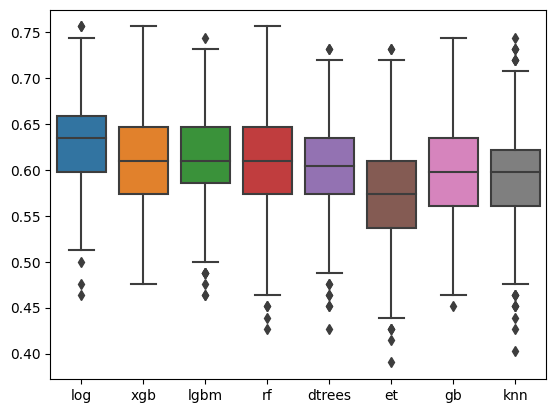

In [ ]:
sns.boxplot(accNewLabel)

<Axes: >

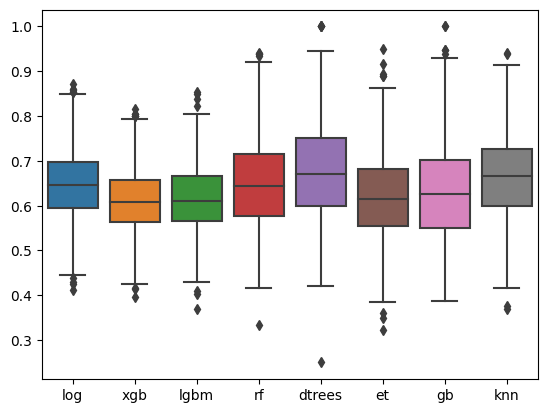

In [ ]:
sns.boxplot(newPre)

<Axes: >

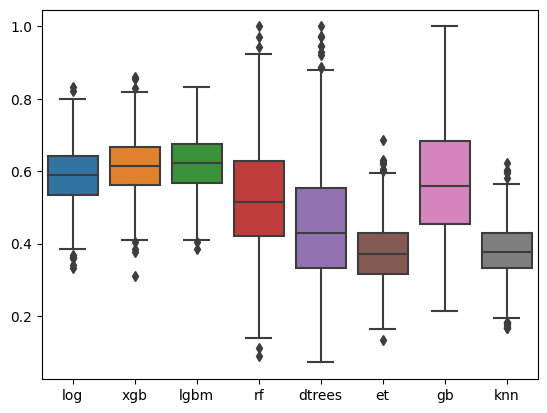

In [ ]:
sns.boxplot(newRec)

<Axes: >

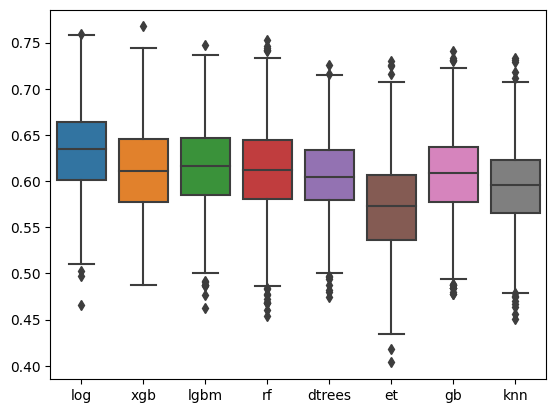

In [ ]:
sns.boxplot(newRoc)

<Axes: >

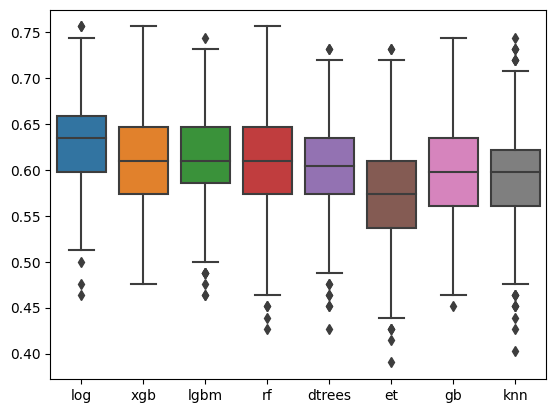

In [ ]:
sns.boxplot(accNewLabel)

#### Predict New Label

In [ ]:
# Fit and Predict
recomendNewLabel = pd.DataFrame()
for i in range(len(modelList)):
  modelList[i].fit(X,y)
  recomendNewLabel[modelNames[i]]= list(modelList[i].predict(prospect))
recomendNewLabel.index = prospect.index

In [ ]:
# Get Company Ids' of the recomended companies by all the models
newLabelCompanyIDs = recomendNewLabel[(recomendNewLabel.log==1)&(recomendNewLabel.xgb==1)&(recomendNewLabel.lgbm==1)&(recomendNewLabel.rf==1)&(recomendNewLabel.dtrees==1)&(recomendNewLabel.et==1)&(recomendNewLabel.gb==1)&(recomendNewLabel.knn==1)].index

<Axes: xlabel='revenue', ylabel='Count'>

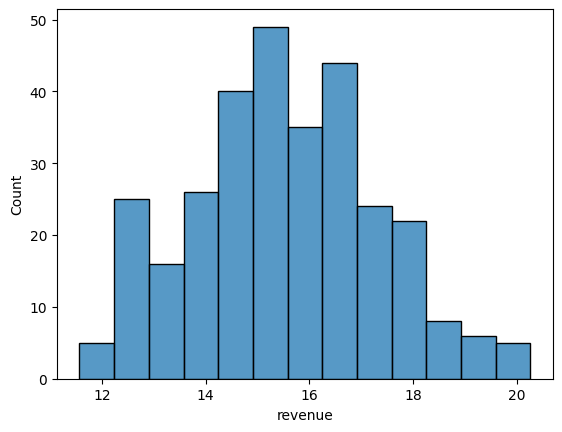

In [ ]:
sns.histplot(prospect.loc[newLabelCompanyIDs]['revenue'])

## Set Diffrence

In [ ]:
# Set Difference of the two labels
finalCompanyIDs = companiesIDs[companiesIDs.isin(newLabelCompanyIDs)]

In [ ]:
# Final Recomended Companies
finalRecomend = prospect.loc[finalCompanyIDs]
finalRecomend

,year,revenue,employee_growth1,employee_growth2,alexa_rank,ownership,business_model,certified_active_company,total_funding,recent_funding,recent_funding_date,number_locations,company_acquired,it_budget
CompanyID,,,,,,,,,,,,,,
2441797,3.871201,19.775322,0.000000,0.000000,4.499810,0,0,1,14.586660,13.815512,7.921898,3.178054,0,0.243898
155353090,4.127134,20.262490,0.106160,0.253867,4.406719,0,0,1,8.832150,8.006701,9.847129,8.343554,0,0.118128
10256729,4.110874,19.642112,0.000000,0.000000,6.120297,0,1,1,0.000000,0.000000,9.994288,3.465736,0,0.122535
19513364,4.025352,17.960231,0.291176,0.525911,7.907652,0,0,1,8.824825,8.824825,9.869414,3.433987,0,0.120111
7783252,4.976734,19.278142,0.000000,0.000000,11.054850,0,0,1,0.000000,0.000000,10.869730,3.713572,0,0.280895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77448833,3.367296,11.896847,0.000000,0.000000,14.048055,1,0,1,0.000000,0.000000,8.533263,3.178054,0,0.167158
25298551,3.091042,12.388957,0.034401,0.031499,9.483492,1,0,1,0.000000,0.000000,8.944550,2.564949,0,0.151735
353887720,2.995732,12.477496,0.000000,0.000000,15.096844,1,0,1,11.082158,11.082158,7.685244,2.772589,0,0.232746


<Axes: xlabel='revenue', ylabel='Count'>

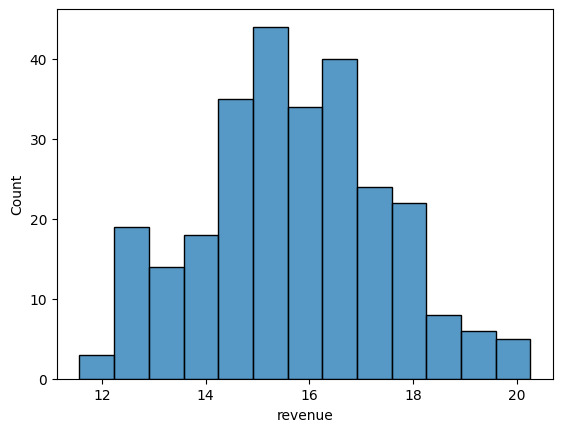

In [ ]:
# Distribution plot of recomended companies
sns.histplot(finalRecomend['revenue'])

<Axes: xlabel='revenue', ylabel='Count'>

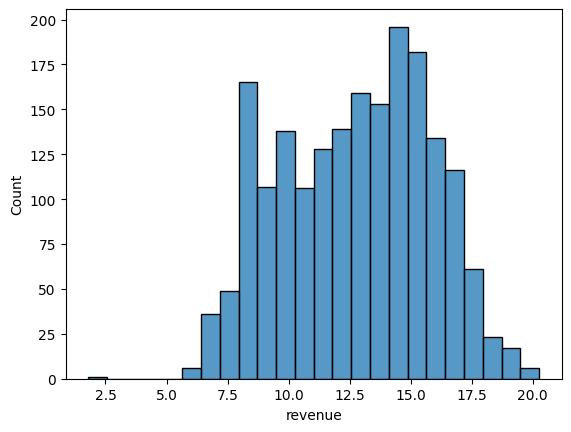

In [ ]:
sns.histplot(prospect['revenue'])